In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

df = pd.read_csv(DATA_PATH)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<hr>

# Data Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [ ]:
# sort values
df.sort_values('median_income', inplace=True)
# df = df.sort_values('median_income')

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0,<1H OCEAN
6688,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,500001.0,INLAND
19800,-123.32,40.43,15.0,661.0,146.0,131.0,57.0,0.4999,56700.0,INLAND
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
20091,-120.19,38.07,43.0,102.0,19.0,44.0,13.0,0.4999,162500.0,INLAND
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,55000.0,INLAND
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
19523,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,82500.0,INLAND


<hr>

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42,
                                     shuffle=False)

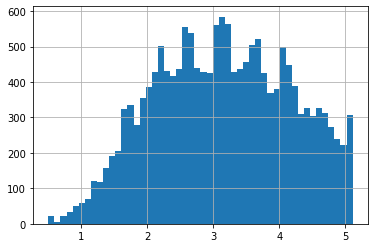

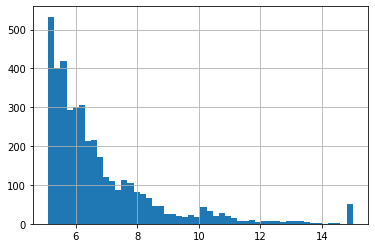

In [ ]:
df_train['median_income'].hist(bins=50)
plt.show()
df_test['median_income'].hist(bins=50)
plt.show()

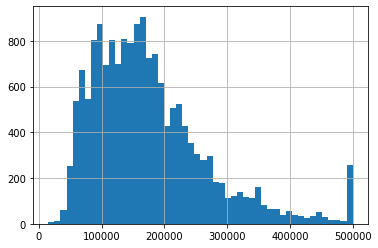

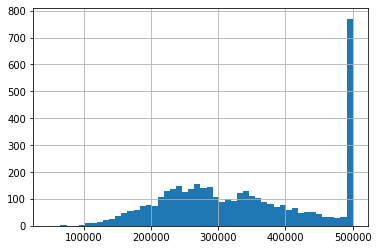

In [ ]:
df_train['median_house_value'].hist(bins=50)
plt.show()
df_test['median_house_value'].hist(bins=50)
plt.show()

In [ ]:
income_category = pd.cut(df['median_income'],
                         bins=[0, 1.5, 3, 4.5, 6, np.inf],
                         labels=[1, 2, 3, 4, 5])

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42,
                                     shuffle=True,
                                     stratify=income_category
                                     )

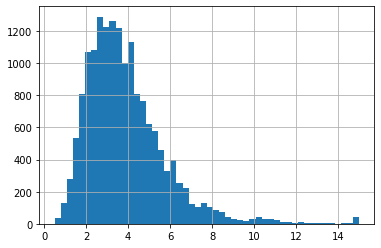

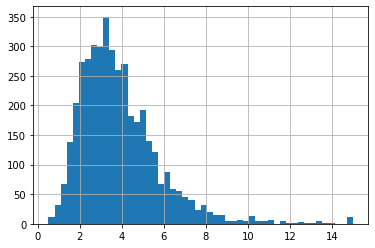

In [ ]:
df_train['median_income'].hist(bins=50)
plt.show()
df_test['median_income'].hist(bins=50)
plt.show()

<hr>

# Save Datasets

In [ ]:
import os
BASE_DIR = os.getcwd()
TEST_DIR = "test_folder"
TRAIN_DIR = "train_folder"

SAVE_TEST_DIR = os.path.join(BASE_DIR, TEST_DIR)
SAVE_TRAIN_DIR = os.path.join(BASE_DIR, TRAIN_DIR)

os.mkdir(SAVE_TEST_DIR)
os.mkdir(SAVE_TRAIN_DIR)

TEST_FILE = os.path.join(SAVE_TEST_DIR, "test.pkl")
TRAIN_FILE = os.path.join(SAVE_TRAIN_DIR, "train.pkl")

df_test.to_pickle(TEST_FILE)
df_train.to_pickle(TRAIN_FILE)

# checkpoint 25:00 min

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp


In [ ]:
import os
BASE_DIR = os.getcwd()
TEST_DIR = "test_folder"
TRAIN_DIR = "train_folder"

SAVE_TEST_DIR = os.path.join(BASE_DIR, TEST_DIR)
SAVE_TRAIN_DIR = os.path.join(BASE_DIR, TRAIN_DIR)

TEST_FILE = os.path.join(SAVE_TEST_DIR, "test.pkl")
TRAIN_FILE = os.path.join(SAVE_TRAIN_DIR, "train.pkl")

In [ ]:
df_train = pd.read_pickle(TRAIN_FILE)
df_train.shape

(16512, 10)

# Exploratory Data Analysis (EDA)

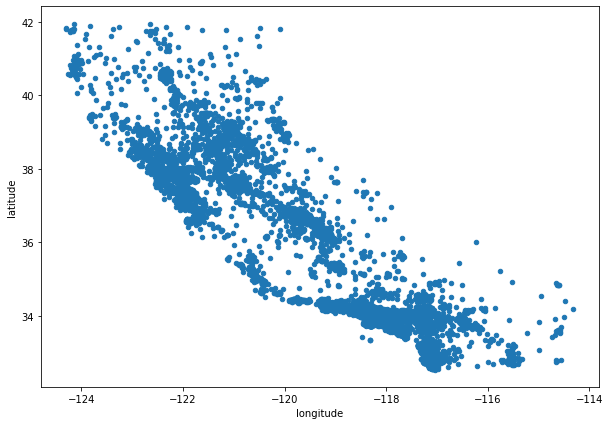

In [ ]:
df_train.plot(kind="scatter", x="longitude", y="latitude",
              figsize=(10, 7))
plt.show()

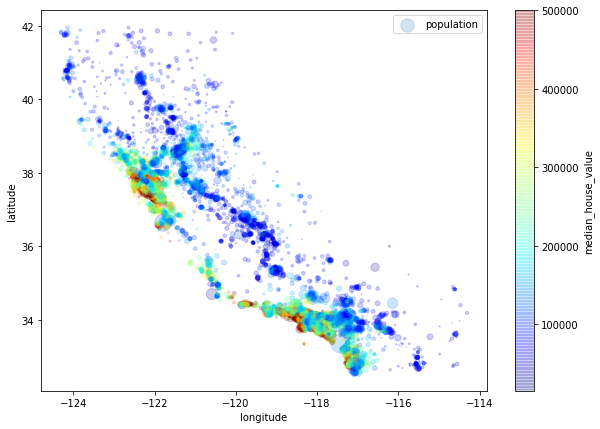

In [ ]:
df_train.plot(kind="scatter", x="longitude", y="latitude",
              figsize=(10, 7),
              alpha=0.2,
              s=df_train["population"]/100, label='population',
              c="median_house_value", cmap=plt.get_cmap("jet"),
              sharex=False)
plt.show()

### Correlation 

In [ ]:
corr = df_train.corr()

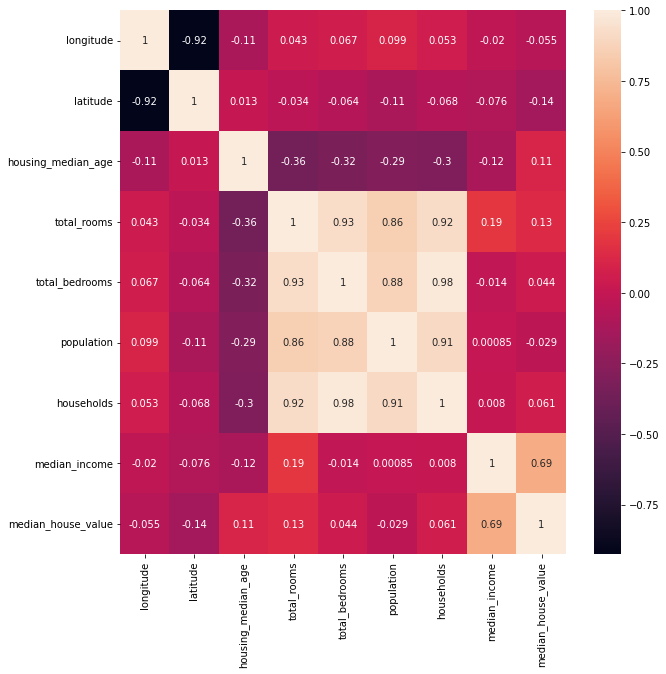

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

In [ ]:
corr_hv = corr['median_house_value'].sort_values(ascending=False)
corr_hv

median_house_value    1.000000
median_income         0.689558
total_rooms           0.129025
housing_median_age    0.108718
households            0.060599
total_bedrooms        0.044082
population           -0.028823
longitude            -0.054830
latitude             -0.137510
Name: median_house_value, dtype: float64

In [ ]:
attr = corr_hv.index[:4]

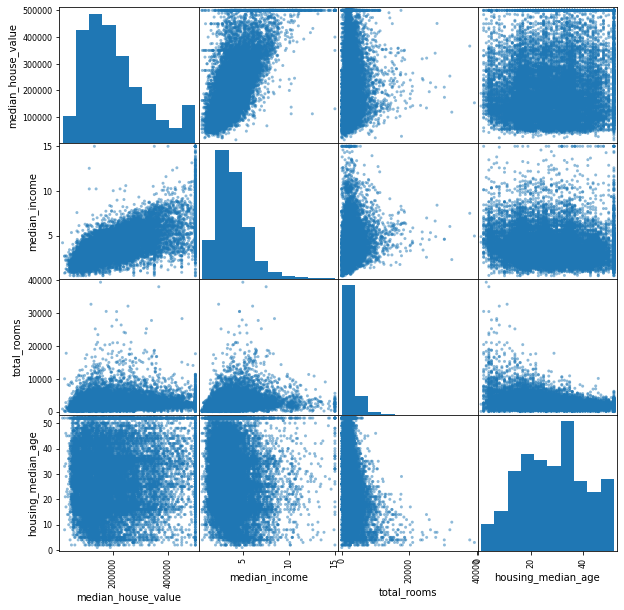

In [ ]:
pd.plotting.scatter_matrix(df_train[attr], figsize=(10, 10))
plt.show()

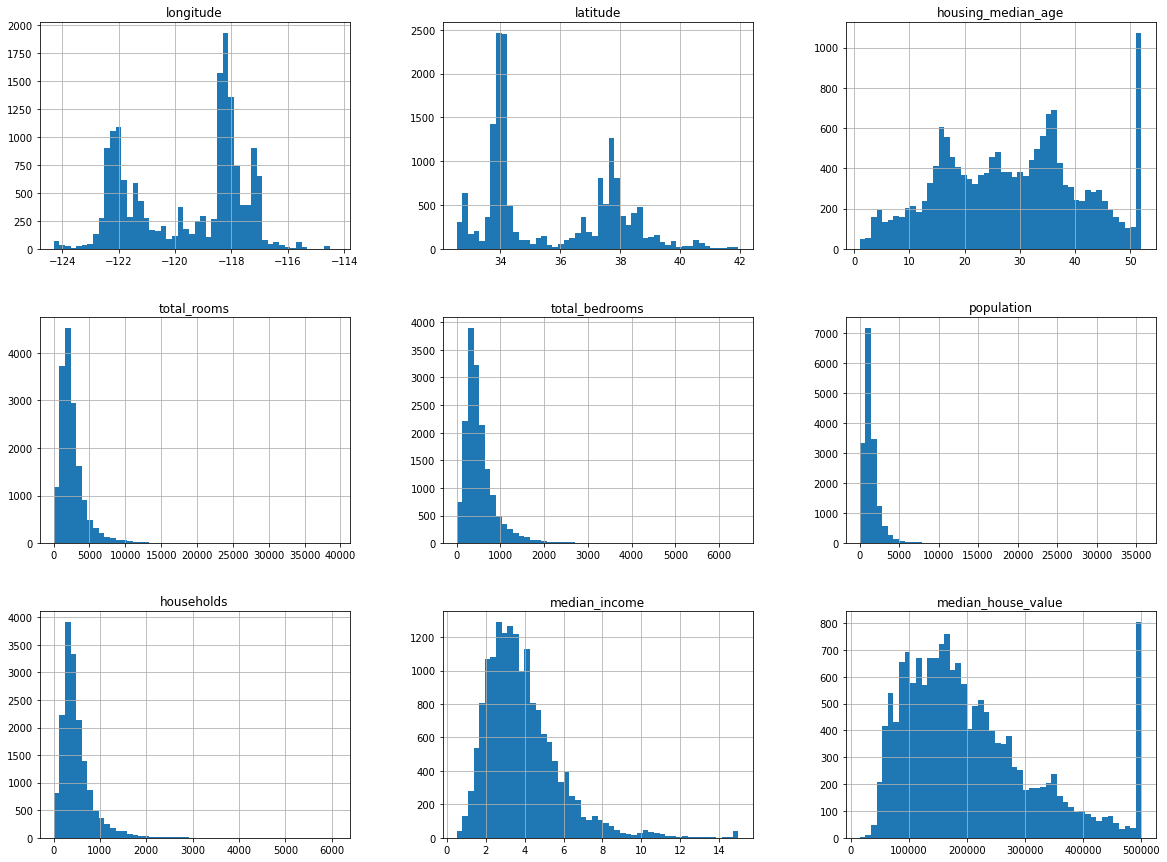

In [ ]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

(0.0, 16.0, 0.0, 550000.0)

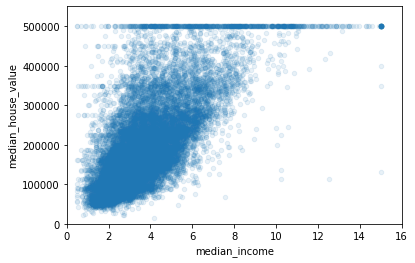

In [ ]:
df_train.plot(kind='scatter', x='median_income', y='median_house_value',
              alpha=0.1)
plt.axis([0, 16, 0, 550_000])

# checkpoitn 15 min

# Feature Engineering

In [ ]:
X_train = df_train.drop(['median_house_value'], axis=1)
y_train = df_train['median_house_value']

In [ ]:
# y_train = df_train.pop('median_house_value')
# X_train = df_train

In [ ]:
# y_train = df_train['medina_house_value']
# X_train = df_train.drop(['medina_house_value'], axis=1, inplace=True)

In [ ]:
y_train

9640      86300.0
10311    410200.0
19842     57600.0
8487     172600.0
7813     184600.0
           ...   
2323     138800.0
15129    139500.0
11080    222100.0
6462     283600.0
10807    215200.0
Name: median_house_value, Length: 16512, dtype: float64

# Data Cleaning

## Pandas

### Missing Values

In [ ]:
H = X_train.copy()

In [ ]:
H[H.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
7097,-117.98,33.92,27.0,3700.0,NaN,1793.0,552.0,5.3668,<1H OCEAN
16038,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,NEAR OCEAN
4600,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
19060,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
14986,-117.03,32.73,34.0,2061.0,NaN,1169.0,400.0,3.5096,NEAR OCEAN
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,INLAND
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN


In [ ]:
# Drop NaN by rows
H.dropna(subset=['total_bedrooms'])
# H = H.dropna(subset=['total_bedrooms'])
# H.dropna(subset=['total_bedrooms'], inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9640,-120.85,37.07,16.0,1795.0,362.0,1642.0,340.0,2.5363,INLAND
10311,-117.77,33.88,8.0,4874.0,627.0,2070.0,619.0,8.1117,<1H OCEAN
19842,-119.10,36.42,26.0,1775.0,416.0,1217.0,383.0,1.8801,INLAND
8487,-118.30,33.91,34.0,1617.0,493.0,1530.0,500.0,2.6182,<1H OCEAN
7813,-118.11,33.90,35.0,2604.0,495.0,1465.0,470.0,4.4896,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
763,-122.08,37.66,37.0,1997.0,436.0,1349.0,437.0,2.1382,NEAR BAY
15129,-116.91,32.86,10.0,3699.0,838.0,2310.0,759.0,2.5365,<1H OCEAN
11080,-117.84,33.80,35.0,1490.0,251.0,629.0,257.0,4.3661,<1H OCEAN
6462,-118.06,34.10,42.0,1576.0,313.0,697.0,282.0,4.3523,<1H OCEAN


In [ ]:
# Drop NaN by columns
H.drop(['total_bedrooms'], axis=1)
# H = H.drop(['total_bedrooms'], axis=1)
# H.drop(['total_bedrooms'], axis=1, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
9640,-120.85,37.07,16.0,1795.0,1642.0,340.0,2.5363,INLAND
10311,-117.77,33.88,8.0,4874.0,2070.0,619.0,8.1117,<1H OCEAN
19842,-119.10,36.42,26.0,1775.0,1217.0,383.0,1.8801,INLAND
8487,-118.30,33.91,34.0,1617.0,1530.0,500.0,2.6182,<1H OCEAN
7813,-118.11,33.90,35.0,2604.0,1465.0,470.0,4.4896,<1H OCEAN
...,...,...,...,...,...,...,...,...
2323,-119.73,36.83,8.0,3602.0,1959.0,580.0,5.3478,INLAND
15129,-116.91,32.86,10.0,3699.0,2310.0,759.0,2.5365,<1H OCEAN
11080,-117.84,33.80,35.0,1490.0,629.0,257.0,4.3661,<1H OCEAN
6462,-118.06,34.10,42.0,1576.0,697.0,282.0,4.3523,<1H OCEAN


In [ ]:
idx = H.isnull().any().index
idx[H.isnull().any()]

Index(['total_bedrooms'], dtype='object')

In [ ]:
# Fill NaN by median, mean, max, min itd.

In [ ]:
m = H['total_bedrooms'].median()
m

435.0

In [ ]:
H['total_bedrooms'].fillna(m, inplace=True)
# H['total_bedrooms'] = H['total_bedrooms'].fillna(m)

In [ ]:
H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9640 to 10807
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.1 MB


### Categorical Variables

In [ ]:
H_clean = pd.get_dummies(H)

## scikit-learn

### Missing Values

In [ ]:
Q = df_train.copy()

In [ ]:
Q_num = Q.select_dtypes(include='number')
Q_cat = Q.select_dtypes(exclude='number')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(Q_num)
Q_num_tr = imputer.transform(Q_num)  # Q_num_tr = impouter.fit_transform(Q_num)

In [ ]:
Q_num_tr_df = pd.DataFrame(data=Q_num_tr,
                           columns=Q_num.columns,
                           index=Q_num.index)

Q_num_tr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9640,-120.85,37.07,16.0,1795.0,362.0,1642.0,340.0,2.5363,86300.0
10311,-117.77,33.88,8.0,4874.0,627.0,2070.0,619.0,8.1117,410200.0
19842,-119.10,36.42,26.0,1775.0,416.0,1217.0,383.0,1.8801,57600.0
8487,-118.30,33.91,34.0,1617.0,493.0,1530.0,500.0,2.6182,172600.0
7813,-118.11,33.90,35.0,2604.0,495.0,1465.0,470.0,4.4896,184600.0
...,...,...,...,...,...,...,...,...,...
2323,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478,138800.0
15129,-116.91,32.86,10.0,3699.0,838.0,2310.0,759.0,2.5365,139500.0
11080,-117.84,33.80,35.0,1490.0,251.0,629.0,257.0,4.3661,222100.0
6462,-118.06,34.10,42.0,1576.0,313.0,697.0,282.0,4.3523,283600.0


### Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
cat_encoder.fit(Q_cat)
Q_cat_tr = cat_encoder.transform(Q_cat)

In [ ]:
cat_col = [f"ocean_proximity_{x}" for x in cat_encoder.categories_[0]]
cat_col

['ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [ ]:
Q_cat_tr_df = pd.DataFrame(Q_cat_tr,
                           columns=cat_col,
                           index=Q_cat.index)
Q_cat_tr_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9640,0.0,1.0,0.0,0.0,0.0
10311,1.0,0.0,0.0,0.0,0.0
19842,0.0,1.0,0.0,0.0,0.0
8487,1.0,0.0,0.0,0.0,0.0
7813,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2323,0.0,1.0,0.0,0.0,0.0
15129,1.0,0.0,0.0,0.0,0.0
11080,1.0,0.0,0.0,0.0,0.0
6462,1.0,0.0,0.0,0.0,0.0


In [ ]:
Q_clean = pd.concat([Q_num_tr_df, Q_cat_tr_df], axis=1)
Q_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9640,-120.85,37.07,16.0,1795.0,362.0,1642.0,340.0,2.5363,86300.0,0.0,1.0,0.0,0.0,0.0
10311,-117.77,33.88,8.0,4874.0,627.0,2070.0,619.0,8.1117,410200.0,1.0,0.0,0.0,0.0,0.0
19842,-119.10,36.42,26.0,1775.0,416.0,1217.0,383.0,1.8801,57600.0,0.0,1.0,0.0,0.0,0.0
8487,-118.30,33.91,34.0,1617.0,493.0,1530.0,500.0,2.6182,172600.0,1.0,0.0,0.0,0.0,0.0
7813,-118.11,33.90,35.0,2604.0,495.0,1465.0,470.0,4.4896,184600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478,138800.0,0.0,1.0,0.0,0.0,0.0
15129,-116.91,32.86,10.0,3699.0,838.0,2310.0,759.0,2.5365,139500.0,1.0,0.0,0.0,0.0,0.0
11080,-117.84,33.80,35.0,1490.0,251.0,629.0,257.0,4.3661,222100.0,1.0,0.0,0.0,0.0,0.0
6462,-118.06,34.10,42.0,1576.0,313.0,697.0,282.0,4.3523,283600.0,1.0,0.0,0.0,0.0,0.0


# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [ ]:
num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median'))
    ]
)

full_pipeline = ColumnTransformer(
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', OneHotEncoder(), cat_attr)
    ]
)

In [ ]:
X_train_tr = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_tr

array([[-120.85,   37.07,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.77,   33.88,    8.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.1 ,   36.42,   26.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-117.84,   33.8 ,   35.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.06,   34.1 ,   42.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.93,   33.65,   35.  , ...,    0.  ,    0.  ,    0.  ]])

In [ ]:
X_test = pd.read_pickle("/content/test_folder/test.pkl")
y_test = X_test.pop('median_house_value')

X_test_tr = full_pipeline.transform(X_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_tr, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train_tr)
y_test_pred = lr.predict(X_test_tr)

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train_pred, y_train, squared=False))
print(mean_squared_error(y_test_pred, y_test, squared=False))

68086.65645527339
71174.7173657361


In [ ]:
num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='mean'))
    ]
)

full_pipeline_1 = ColumnTransformer(
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', OneHotEncoder(), cat_attr)
    ]
)

In [ ]:
X_train_tr = full_pipeline_1.fit_transform(X_train)
X_test_tr = full_pipeline_1.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_tr, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train_tr)
y_test_pred = lr.predict(X_test_tr)

print(mean_squared_error(y_train_pred, y_train, squared=False))
print(mean_squared_error(y_test_pred, y_test, squared=False))

68082.72579214736
71179.96050704837


# NEXT STEPS


### Overfitting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=35)
regr_1.fit(X_train_tr, y_train)
y_train_pred = regr_1.predict(X_train_tr)
y_test_pred = regr_1.predict(X_test_tr)

print(mean_squared_error(y_train_pred, y_train, squared=False))
print(mean_squared_error(y_test_pred, y_test, squared=False))

1.1005636329070296
69709.14197400292


[Text(0.5, 0.8333333333333334, 'X[7] <= 5.032\nsquared_error = 13208929142.432\nsamples = 16512\nvalue = 206621.787'),
 Text(0.25, 0.5, 'X[9] <= 0.5\nsquared_error = 8266455873.814\nsamples = 12999\nvalue = 173340.031'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8053119480.686\nsamples = 8268\nvalue = 208269.25'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2780843452.207\nsamples = 4731\nvalue = 112296.957'),
 Text(0.75, 0.5, 'X[7] <= 7.399\nsquared_error = 12232489003.803\nsamples = 3513\nvalue = 329772.813'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9241065569.526\nsamples = 2715\nvalue = 296917.966'),
 Text(0.875, 0.16666666666666666, 'squared_error = 6242642209.002\nsamples = 798\nvalue = 441553.401')]

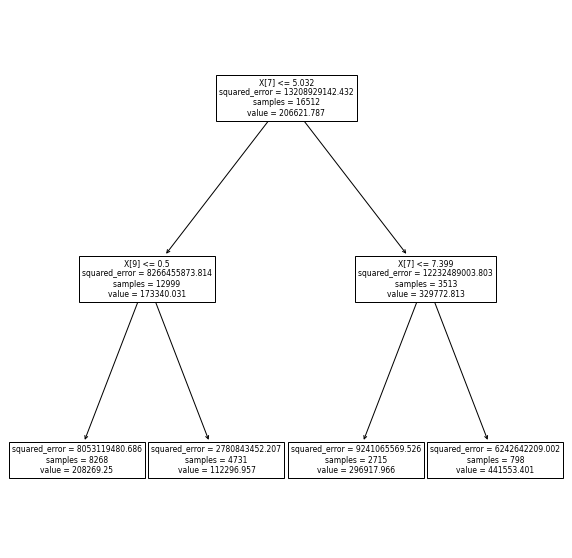

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(regr_1, ax=ax)

References:\
https://github.com/ageron/handson-ml2 \
https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/